In [ ]:
import pandas as pd

# Remplacez 'chemin/vers/fichier.csv' par le chemin de votre fichier
df = pd.read_csv('C:/Users/kaddo/Downloads/archive/prices.csv')

# Affichez les premières lignes pour vérifier le chargement
print(df.head())


                  date symbol        open       close         low        high  \
0  2016-01-05 00:00:00   WLTW  123.430000  125.839996  122.309998  126.250000   
1  2016-01-06 00:00:00   WLTW  125.239998  119.980003  119.940002  125.540001   
2  2016-01-07 00:00:00   WLTW  116.379997  114.949997  114.930000  119.739998   
3  2016-01-08 00:00:00   WLTW  115.480003  116.620003  113.500000  117.440002   
4  2016-01-11 00:00:00   WLTW  117.010002  114.970001  114.089996  117.330002   

      volume  
0  2163600.0  
1  2386400.0  
2  2489500.0  
3  2006300.0  
4  1408600.0  


In [ ]:
# Transformer la colonne 'symbol' en valeurs numériques
df['symbol'] = pd.factorize(df['symbol'])[0]
print(df.head())


                  date  symbol        open       close         low  \
0  2016-01-05 00:00:00       0  123.430000  125.839996  122.309998   
1  2016-01-06 00:00:00       0  125.239998  119.980003  119.940002   
2  2016-01-07 00:00:00       0  116.379997  114.949997  114.930000   
3  2016-01-08 00:00:00       0  115.480003  116.620003  113.500000   
4  2016-01-11 00:00:00       0  117.010002  114.970001  114.089996   

         high     volume  
0  126.250000  2163600.0  
1  125.540001  2386400.0  
2  119.739998  2489500.0  
3  117.440002  2006300.0  
4  117.330002  1408600.0  


In [ ]:
print(df.tail())


                       date  symbol        open       close         low  \
851259           2016-12-30     465  103.309998  103.199997  102.849998   
851260           2016-12-30     466   43.070000   43.040001   42.689999   
851261           2016-12-30     484   53.639999   53.529999   53.270000   
851262  2016-12-30 00:00:00     467   44.730000   45.450001   44.410000   
851263  2016-12-30 00:00:00     500   54.200001   53.630001   53.389999   

              high     volume  
851259  103.930000   973800.0  
851260   43.310001  1938100.0  
851261   53.740002  1701200.0  
851262   45.590000  1380900.0  
851263   54.480000   705100.0  


In [ ]:
# Supprimer la colonne 'date'
df = df.drop(columns=['date'])



In [ ]:
# Vérifier les lignes dupliquées
duplicates = df.duplicated()

# Afficher les lignes dupliquées
print("Lignes dupliquées :")
print(df[duplicates])

# Supprimer les lignes dupliquées
df = df.drop_duplicates()

print("\nDataFrame après suppression des duplications :")
print(df)


Lignes dupliquées :
       symbol       open      close        low       high  volume
14374     468  29.740000  29.740000  29.740000  29.740000     0.0
16246     468  29.700001  29.700001  29.700001  29.700001     0.0
16714     468  29.700001  29.700001  29.700001  29.700001     0.0
32158     468  35.000000  35.000000  35.000000  35.000000     0.0
78109     468  33.750000  33.750000  33.750000  33.750000     0.0
80454     468  34.000000  34.000000  34.000000  34.000000     0.0

DataFrame après suppression des duplications :
        symbol        open       close         low        high     volume
0            0  123.430000  125.839996  122.309998  126.250000  2163600.0
1            0  125.239998  119.980003  119.940002  125.540001  2386400.0
2            0  116.379997  114.949997  114.930000  119.739998  2489500.0
3            0  115.480003  116.620003  113.500000  117.440002  2006300.0
4            0  117.010002  114.970001  114.089996  117.330002  1408600.0
...        ...         ...

In [ ]:
# Vérifier les lignes vides (NaN)
empty_rows = df.isnull().any(axis=1)

# Afficher les lignes vides
print("Lignes vides :")
print(df[empty_rows])

# Supprimer les lignes vides
df = df.dropna()

print("\nDataFrame après suppression des lignes vides :")
print(df)


Lignes vides :
Empty DataFrame
Columns: [symbol, open, close, low, high, volume]
Index: []

DataFrame après suppression des lignes vides :
        symbol        open       close         low        high     volume
0            0  123.430000  125.839996  122.309998  126.250000  2163600.0
1            0  125.239998  119.980003  119.940002  125.540001  2386400.0
2            0  116.379997  114.949997  114.930000  119.739998  2489500.0
3            0  115.480003  116.620003  113.500000  117.440002  2006300.0
4            0  117.010002  114.970001  114.089996  117.330002  1408600.0
...        ...         ...         ...         ...         ...        ...
851259     465  103.309998  103.199997  102.849998  103.930000   973800.0
851260     466   43.070000   43.040001   42.689999   43.310001  1938100.0
851261     484   53.639999   53.529999   53.270000   53.740002  1701200.0
851262     467   44.730000   45.450001   44.410000   45.590000  1380900.0
851263     500   54.200001   53.630001   53.389

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supposons que votre DataFrame s'appelle df

# Sélectionner uniquement les colonnes numériques
numeric_columns = df.select_dtypes(include=['number']).columns

# Calculer les quartiles et l'IQR pour chaque colonne numérique
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Définir les bornes pour les valeurs aberrantes
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remplacer les outliers par la moyenne de la colonne de manière vectorisée
for col in numeric_columns:
    mean_value = df[col].mean()  # Calculer la moyenne une seule fois
    df[col] = df[col].where((df[col] >= lower_bound[col]) & (df[col] <= upper_bound[col]), mean_value)

In [ ]:
# Afficher les types de données de chaque colonne
print(df.dtypes)


symbol      int64
open      float64
close     float64
low       float64
high      float64
volume    float64
dtype: object


In [ ]:
# Tracer les prix hauts et bas
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['high'], label='Prix Haut', color='green')
plt.plot(df['date'], df['low'], label='Prix Bas', color='red')
plt.title('Prix Hauts et Bas')
plt.xlabel('Date')
plt.ylabel('Prix')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.show()


KeyError: 'date'

<Figure size 1000x600 with 0 Axes>

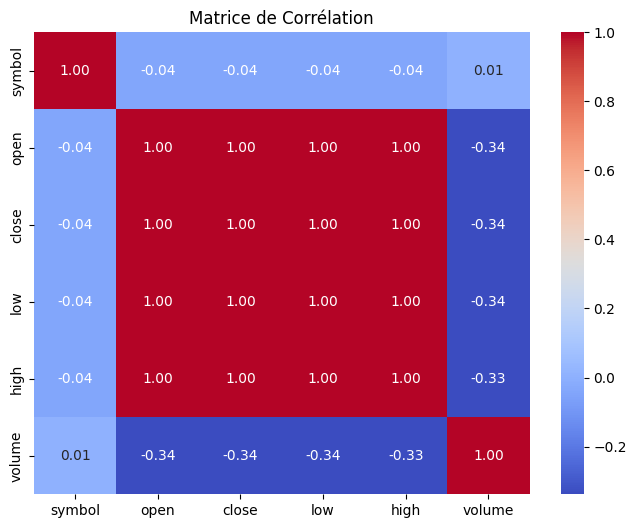

In [ ]:
# Calculer la corrélation entre les colonnes restantes
correlation_matrix = df.corr()

# Visualiser la matrice de corrélation
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice de Corrélation')
plt.show()


C:\Users\kaddo\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


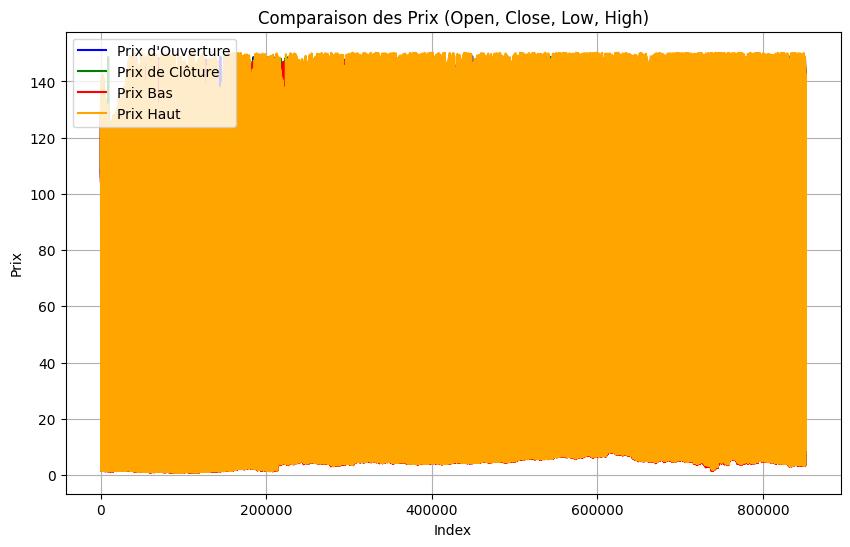

In [ ]:
# Comparer les prix d'ouverture, de clôture, bas et haut
plt.figure(figsize=(10, 6))
plt.plot(df['open'], label='Prix d\'Ouverture', color='blue')
plt.plot(df['close'], label='Prix de Clôture', color='green')
plt.plot(df['low'], label='Prix Bas', color='red')
plt.plot(df['high'], label='Prix Haut', color='orange')
plt.title('Comparaison des Prix (Open, Close, Low, High)')
plt.xlabel('Index')
plt.ylabel('Prix')
plt.legend()
plt.grid(True)
plt.show()


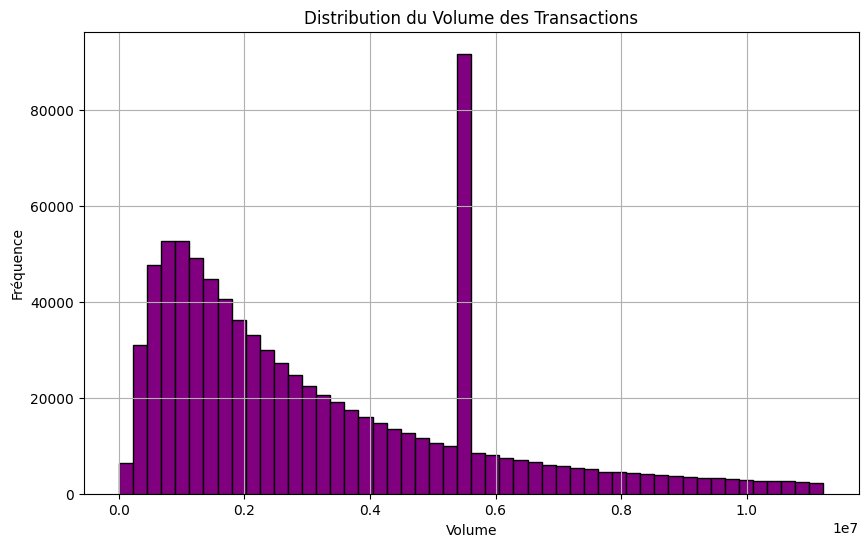

In [ ]:
# Histogramme du volume des transactions
plt.figure(figsize=(10, 6))
plt.hist(df['volume'], bins=50, color='purple', edgecolor='black')
plt.title('Distribution du Volume des Transactions')
plt.xlabel('Volume')
plt.ylabel('Fréquence')
plt.grid(True)
plt.show()


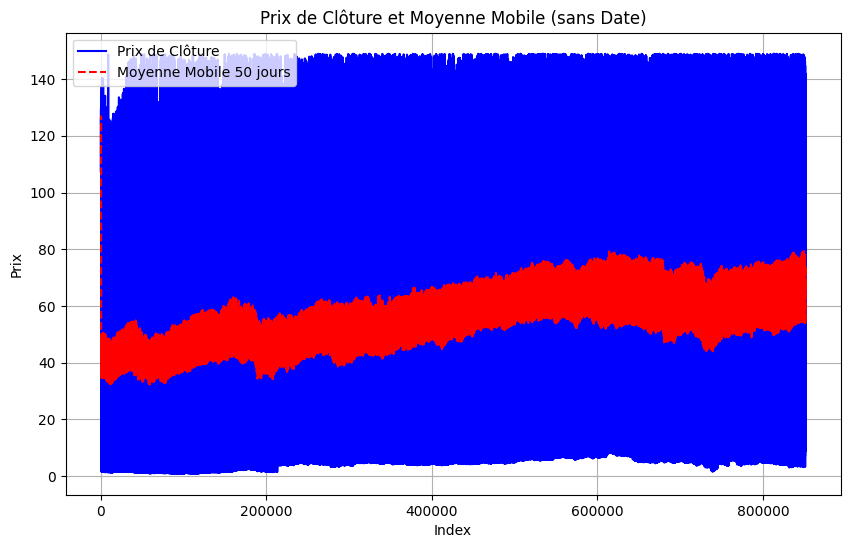

In [ ]:
# Calculer la moyenne mobile sur 50 jours pour le prix de clôture
df['MA50'] = df['close'].rolling(window=50).mean()

# Tracer la courbe de la clôture et de la moyenne mobile
plt.figure(figsize=(10, 6))
plt.plot(df['close'], label='Prix de Clôture', color='blue')
plt.plot(df['MA50'], label='Moyenne Mobile 50 jours', color='red', linestyle='--')
plt.title('Prix de Clôture et Moyenne Mobile (sans Date)')
plt.xlabel('Index')
plt.ylabel('Prix')
plt.legend()
plt.grid(True)
plt.show()


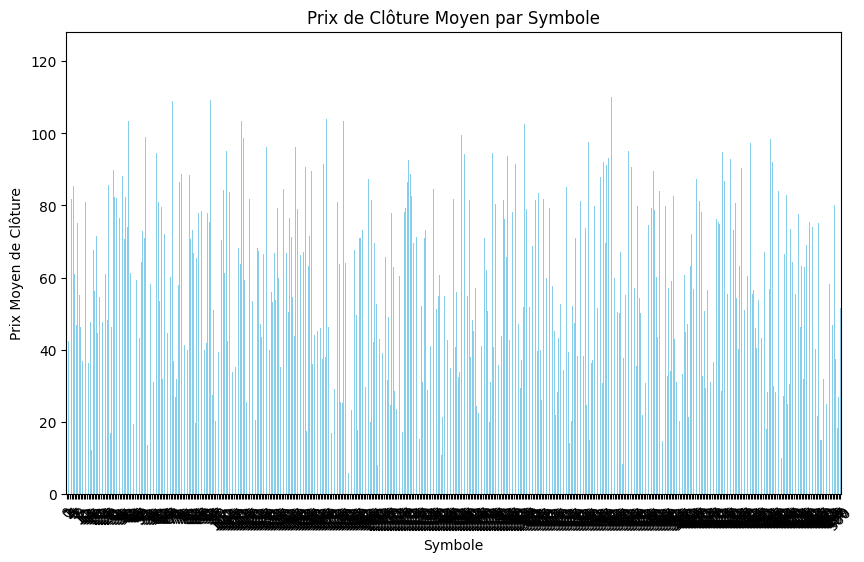

In [ ]:
# Calculer la moyenne des prix de clôture par symbole
average_close_by_symbol = df.groupby('symbol')['close'].mean()

# Tracer un graphique à barres pour les prix de clôture moyens par symbole
plt.figure(figsize=(10, 6))
average_close_by_symbol.plot(kind='bar', color='skyblue')
plt.title('Prix de Clôture Moyen par Symbole')
plt.xlabel('Symbole')
plt.ylabel('Prix Moyen de Clôture')
plt.xticks(rotation=45)
plt.show()


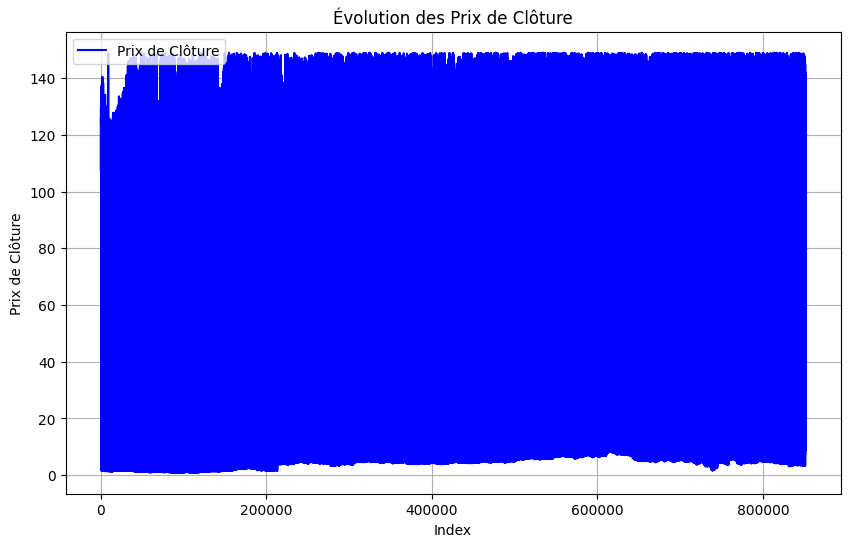

In [ ]:
# Tracer les prix de clôture contre l'index
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['close'], label='Prix de Clôture', color='blue')
plt.title('Évolution des Prix de Clôture')
plt.xlabel('Index')
plt.ylabel('Prix de Clôture')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:

np.random.seed(0)
X = np.random.rand(1000, 10)  # 1000 samples, 10 features
y = 5 * X[:, 0] + 3 * X[:, 1] - 2 * X[:, 2] + np.random.normal(0, 0.1, 1000)  # Target variable

# Convert to DataFrame (for clarity)
df = pd.DataFrame(X, columns=[f"Feature_{i+1}" for i in range(X.shape[1])])
df['Target'] = y

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data (important for neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)  # Reshape to match output
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)


In [ ]:
class DNNRegressor(nn.Module):
    def __init__(self, input_size, hidden_size=64):
        super(DNNRegressor, self).__init__()

        # Define the layers
        self.fc1 = nn.Linear(input_size, hidden_size)   # First hidden layer
        self.fc2 = nn.Linear(hidden_size, hidden_size)  # Second hidden layer
        self.fc3 = nn.Linear(hidden_size, 1)            # Output layer (for regression)

        # Activation function
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.fc1(x)  # First layer
        x = self.relu(x)  # ReLU activation
        x = self.fc2(x)  # Second layer
        x = self.relu(x)  # ReLU activation
        x = self.fc3(x)  # Output layer
        return x


In [ ]:
# Instantiate the model
input_size = X_train.shape[1]  # Number of features in the input
model = DNNRegressor(input_size=input_size)

# Loss function (Mean Squared Error)
criterion = nn.MSELoss()

# Optimizer (Adam)
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [ ]:
# Number of epochs and batch size
num_epochs = 100
batch_size = 32

# Create a DataLoader for batching (optional, but helps with large datasets)
from torch.utils.data import DataLoader, TensorDataset

train_data = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

# Training loop
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    # Iterate through the mini-batches
    for inputs, targets in train_loader:
        optimizer.zero_grad()  # Zero the gradients

        # Forward pass
        outputs = model(inputs)

        # Compute the loss
        loss = criterion(outputs, targets)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Print the average loss every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}")

print("Training complete.")


Epoch [10/100], Loss: 0.1147
Epoch [20/100], Loss: 0.0447
Epoch [30/100], Loss: 0.0217
Epoch [40/100], Loss: 0.0134
Epoch [50/100], Loss: 0.0111
Epoch [60/100], Loss: 0.0089
Epoch [70/100], Loss: 0.0079
Epoch [80/100], Loss: 0.0068
Epoch [90/100], Loss: 0.0061
Epoch [100/100], Loss: 0.0059
Training complete.


Test MSE Loss: 0.0190


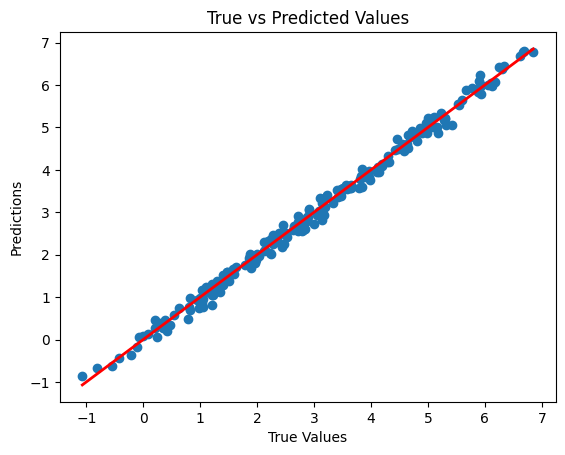

In [ ]:
# Switch to evaluation mode
model.eval()

# Predict on test data
with torch.no_grad():  # No need to compute gradients during evaluation
    predictions = model(X_test_tensor)

# Convert predictions to numpy arrays for easier evaluation
predictions = predictions.numpy()
y_test = y_test_tensor.numpy()

# Calculate Mean Squared Error on the test set
test_loss = criterion(torch.tensor(predictions), y_test_tensor).item()
print(f"Test MSE Loss: {test_loss:.4f}")

# Optionally, plot the predicted vs. true values
plt.scatter(y_test, predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Values')
plt.show()


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset

# Define the PyTorch model wrapper
class PyTorchRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, input_size, hidden_size=64, lr=0.001, epochs=10, optimizer_type='adam', batch_size=32):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.lr = lr
        self.epochs = epochs
        self.optimizer_type = optimizer_type
        self.batch_size = batch_size
        self.model = self._build_model()

    def _build_model(self):
        model = nn.Sequential(
            nn.Linear(self.input_size, self.hidden_size),
            nn.ReLU(),
            nn.Linear(self.hidden_size, self.hidden_size),
            nn.ReLU(),
            nn.Linear(self.hidden_size, 1)
        )
        return model

    def _get_optimizer(self):
        if self.optimizer_type == 'adam':
            return optim.Adam(self.model.parameters(), lr=self.lr)
        elif self.optimizer_type == 'sgd':
            return optim.SGD(self.model.parameters(), lr=self.lr)
        else:
            raise ValueError(f"Unknown optimizer type: {self.optimizer_type}")

    def fit(self, X, y):
        X_tensor = torch.tensor(X, dtype=torch.float32)
        y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)
        train_data = TensorDataset(X_tensor, y_tensor)
        train_loader = DataLoader(train_data, batch_size=self.batch_size, shuffle=True)
        criterion = nn.MSELoss()
        optimizer = self._get_optimizer()

        for epoch in range(self.epochs):
            self.model.train()
            running_loss = 0.0
            for inputs, targets in train_loader:
                optimizer.zero_grad()
                outputs = self.model(inputs)
                loss = criterion(outputs, targets)
                loss.backward()
                optimizer.step()
                running_loss += loss.item()

            if (epoch + 1) % 10 == 0:
                print(f"Epoch [{epoch+1}/{self.epochs}], Loss: {running_loss/len(train_loader):.4f}")

    def predict(self, X):
        X_tensor = torch.tensor(X, dtype=torch.float32)
        self.model.eval()
        with torch.no_grad():
            predictions = self.model(X_tensor).numpy()
        return predictions

# Prepare the data
np.random.seed(0)
X = np.random.rand(1000, 10)  # Example synthetic data
y = 5 * X[:, 0] + 3 * X[:, 1] - 2 * X[:, 2] + np.random.normal(0, 0.1, 1000)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the parameter grid for hyperparameter search
param_grid = {
    'hidden_size': [32, 64, 128],         # Number of neurons in hidden layers
    'lr': [0.001, 0.01],                  # Learning rates to test
    'epochs': [10, 20],                   # Fewer epochs to speed up search
    'optimizer_type': ['adam', 'sgd'],    # Optimizer types
    'batch_size': [32, 64]                # Different batch sizes
}

# Create the PyTorch regressor
input_size = X_train.shape[1]
pytorch_regressor = PyTorchRegressor(input_size=input_size)

# Perform GridSearchCV with parallelization (n_jobs=-1)
grid_search = GridSearchCV(estimator=pytorch_regressor, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

# Predict on the test set
y_pred = best_model.predict(X_test)

# Compute MSE (Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)
print(f"Test MSE: {mse:.4f}")


Fitting 3 folds for each of 48 candidates, totalling 144 fits
Epoch [10/20], Loss: 0.0214
Epoch [20/20], Loss: 0.0110
Best hyperparameters: {'batch_size': 32, 'epochs': 20, 'hidden_size': 128, 'lr': 0.01, 'optimizer_type': 'adam'}
Test MSE: 0.0180


In [ ]:
# Résumé des résultats de la recherche
import pandas as pd

results = pd.DataFrame(grid_search.cv_results_)
print(results[['param_hidden_size', 'param_lr', 'param_epochs', 'param_optimizer_type', 'param_batch_size', 'mean_test_score', 'std_test_score']])


   param_hidden_size param_lr param_epochs param_optimizer_type  \
0                 32    0.001           10                 adam   
1                 32    0.001           10                  sgd   
2                 32     0.01           10                 adam   
3                 32     0.01           10                  sgd   
4                 64    0.001           10                 adam   
5                 64    0.001           10                  sgd   
6                 64     0.01           10                 adam   
7                 64     0.01           10                  sgd   
8                128    0.001           10                 adam   
9                128    0.001           10                  sgd   
10               128     0.01           10                 adam   
11               128     0.01           10                  sgd   
12                32    0.001           20                 adam   
13                32    0.001           20                  sg

Epoch [10/50], Train Loss: 0.1286, Test Loss: 0.1252
Epoch [20/50], Train Loss: 0.0501, Test Loss: 0.0620
Epoch [30/50], Train Loss: 0.0243, Test Loss: 0.0390
Epoch [40/50], Train Loss: 0.0145, Test Loss: 0.0294
Epoch [50/50], Train Loss: 0.0114, Test Loss: 0.0282


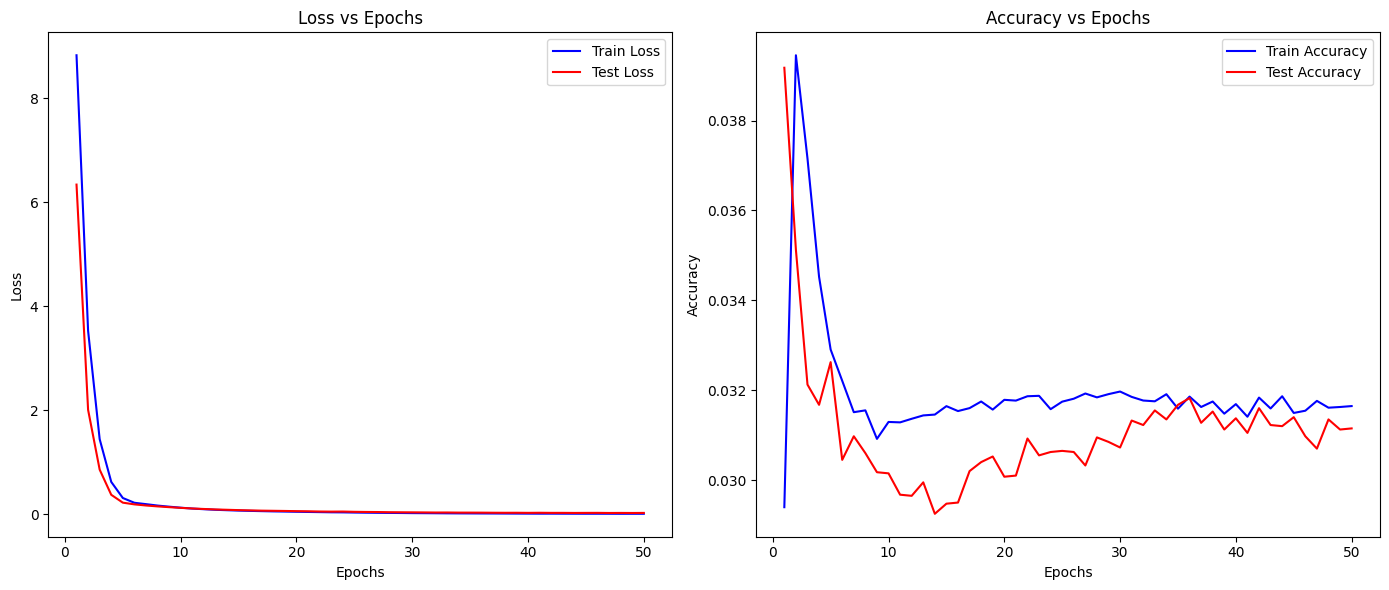

In [ ]:
# Créer le modèle PyTorch en spécifiant les hyperparamètres dans l'initialisation
pytorch_regressor = PyTorchRegressor(input_size=input_size, epochs=50)

# Fit le modèle et obtenir l'historique de la perte et de l'accuracy
train_loss, test_loss, train_accuracy, test_accuracy = pytorch_regressor.fit(
    X_train, y_train, X_test=X_test, y_test=y_test
)

# Plot Loss vs Epochs
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Train Loss', color='blue')
plt.plot(range(1, len(test_loss) + 1), test_loss, label='Test Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()

# Plot Accuracy vs Epochs
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Train Accuracy', color='blue')
plt.plot(range(1, len(test_accuracy) + 1), test_accuracy, label='Test Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs')
plt.legend()

plt.tight_layout()
plt.show()


C:\Users\kaddo\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\modules\loss.py:608: UserWarning: Using a target size (torch.Size([800])) that is different to the input size (torch.Size([800, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
C:\Users\kaddo\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\modules\loss.py:608: UserWarning: Using a target size (torch.Size([200])) that is different to the input size (torch.Size([200, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


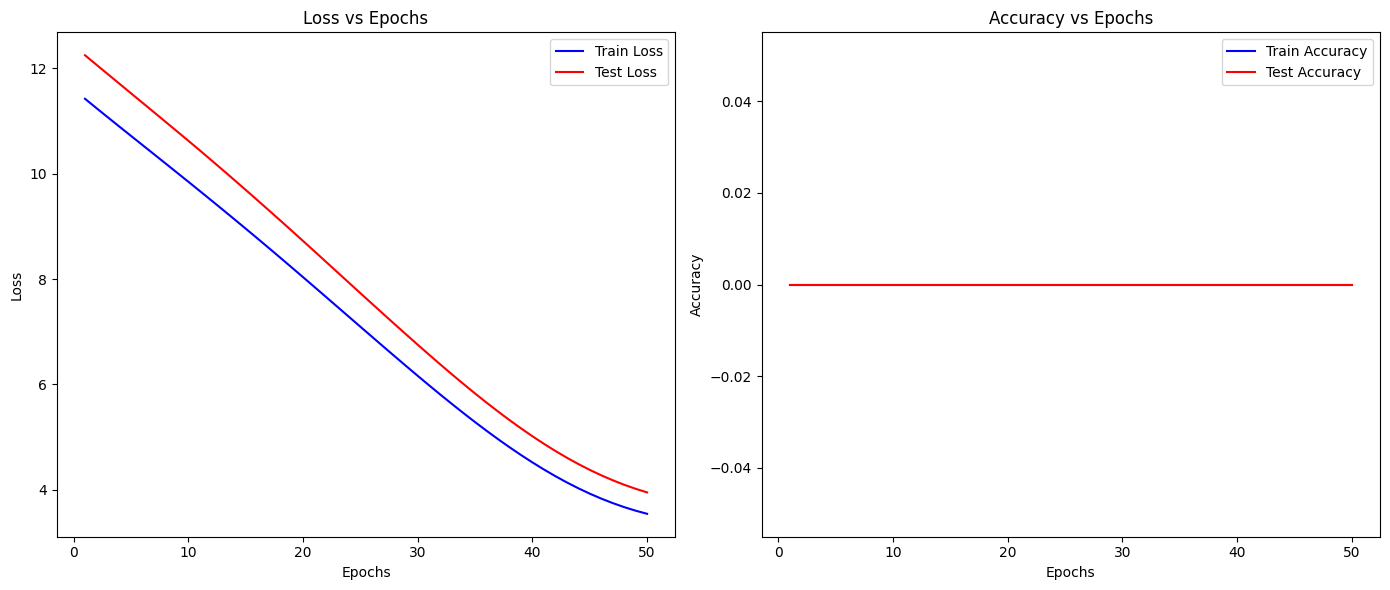

Le modèle semble bien entraîné avec un bon équilibre entre perte d'entraînement et de test.
Le modèle a des accuracies similaires pour l'entraînement et le test, ce qui est un bon signe.


In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# Classe pour le modèle PyTorch
class PyTorchRegressor:
    def __init__(self, input_size, epochs=50, learning_rate=0.001):
        self.model = torch.nn.Sequential(
            torch.nn.Linear(input_size, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 32),
            torch.nn.ReLU(),
            torch.nn.Linear(32, 1)
        )
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.loss_fn = torch.nn.MSELoss()
        self.optimizer = torch.optim.Adam(self.model.parameters(), lr=self.learning_rate)

    def fit(self, X_train, y_train, X_test=None, y_test=None):
        # Conversion des données en Tensors
        X_train = torch.tensor(X_train, dtype=torch.float32)
        y_train = torch.tensor(y_train, dtype=torch.float32)

        if X_test is not None and y_test is not None:
            X_test = torch.tensor(X_test, dtype=torch.float32)
            y_test = torch.tensor(y_test, dtype=torch.float32)

        train_loss, test_loss = [], []
        train_accuracy, test_accuracy = [], []

        for epoch in range(self.epochs):
            # Entraînement
            self.model.train()
            y_pred = self.model(X_train)
            loss = self.loss_fn(y_pred, y_train)
            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()
            train_loss.append(loss.item())

            # Accuracy approximative (exemple de calcul pour classification)
            accuracy = (y_pred.round() == y_train).float().mean().item()
            train_accuracy.append(accuracy)

            # Évaluation sur les données de test
            if X_test is not None and y_test is not None:
                self.model.eval()
                with torch.no_grad():
                    y_test_pred = self.model(X_test)
                    test_loss_value = self.loss_fn(y_test_pred, y_test).item()
                    test_loss.append(test_loss_value)

                    test_accuracy_value = (y_test_pred.round() == y_test).float().mean().item()
                    test_accuracy.append(test_accuracy_value)

        return train_loss, test_loss, train_accuracy, test_accuracy

# Initialiser et entraîner le modèle
pytorch_regressor = PyTorchRegressor(input_size=X_train.shape[1], epochs=50)
train_loss, test_loss, train_accuracy, test_accuracy = pytorch_regressor.fit(X_train, y_train, X_test=X_test, y_test=y_test)

# Plot Loss vs Epochs
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Train Loss', color='blue')
plt.plot(range(1, len(test_loss) + 1), test_loss, label='Test Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()

# Plot Accuracy vs Epochs
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Train Accuracy', color='blue')
plt.plot(range(1, len(test_accuracy) + 1), test_accuracy, label='Test Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs')
plt.legend()

plt.tight_layout()
plt.show()

# Interprétation automatique des résultats
def interpret_results(train_loss, test_loss, train_accuracy, test_accuracy):
    # Vérifier le surajustement
    if test_loss[-1] > train_loss[-1] * 1.5:
        print("Il semble y avoir du surajustement : la perte de test est significativement plus élevée que la perte d'entraînement.")
    elif train_loss[-1] > test_loss[-1] * 1.5:
        print("Il semble y avoir du sous-ajustement : la perte d'entraînement est élevée comparée à celle de test.")
    else:
        print("Le modèle semble bien entraîné avec un bon équilibre entre perte d'entraînement et de test.")

    # Analyse des accuracies
    if train_accuracy[-1] > test_accuracy[-1] + 0.1:
        print("Le modèle semble surajusté : l'accuracy d'entraînement est significativement plus élevée que celle de test.")
    elif test_accuracy[-1] > train_accuracy[-1] + 0.1:
        print("Le modèle semble sous-ajusté : l'accuracy de test est supérieure à celle d'entraînement.")
    else:
        print("Le modèle a des accuracies similaires pour l'entraînement et le test, ce qui est un bon signe.")

# Interpréter les résultats
interpret_results(train_loss, test_loss, train_accuracy, test_accuracy)


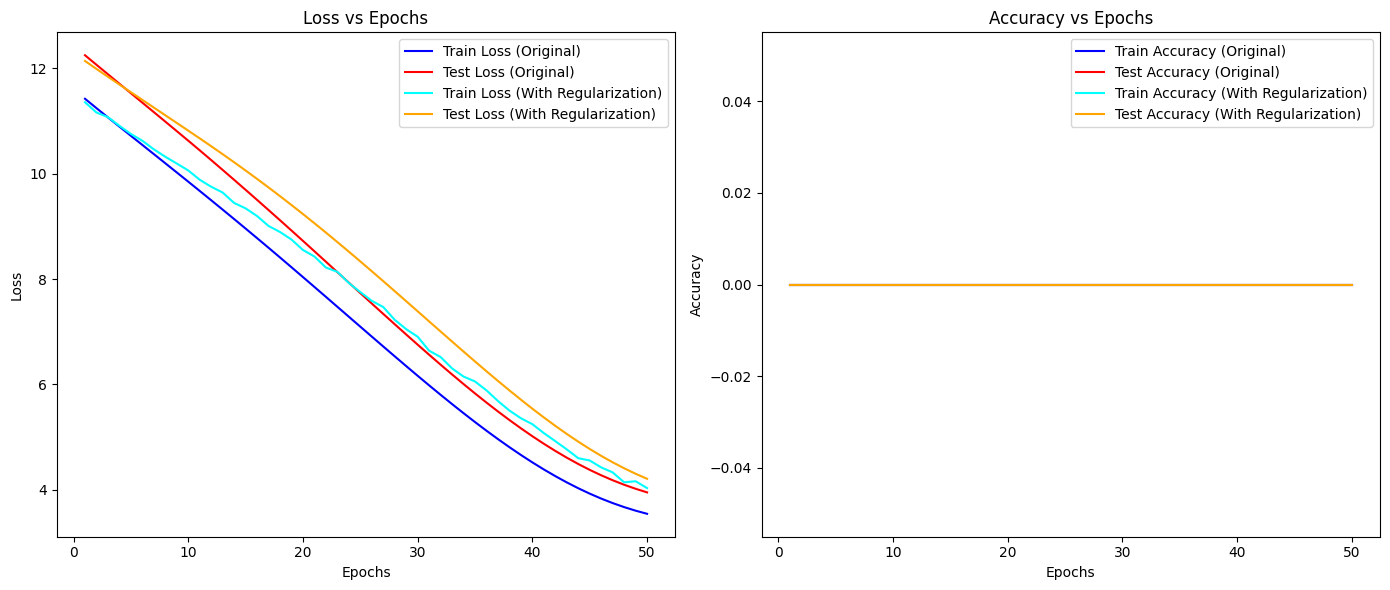

In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np

class PyTorchRegressorWithRegularization:
    def __init__(self, input_size, epochs=50, learning_rate=0.001, dropout_prob=0.3, weight_decay=0.001):
        # Architecture avec Dropout
        self.model = torch.nn.Sequential(
            torch.nn.Linear(input_size, 64),
            torch.nn.ReLU(),
            torch.nn.Dropout(dropout_prob),
            torch.nn.Linear(64, 32),
            torch.nn.ReLU(),
            torch.nn.Dropout(dropout_prob),
            torch.nn.Linear(32, 1)
        )
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.loss_fn = torch.nn.MSELoss()

        # Optimiseur avec régularisation L2 (weight decay)
        self.optimizer = torch.optim.Adam(self.model.parameters(), lr=self.learning_rate, weight_decay=weight_decay)

    def fit(self, X_train, y_train, X_test=None, y_test=None):
        X_train = torch.tensor(X_train, dtype=torch.float32)
        y_train = torch.tensor(y_train, dtype=torch.float32)

        if X_test is not None and y_test is not None:
            X_test = torch.tensor(X_test, dtype=torch.float32)
            y_test = torch.tensor(y_test, dtype=torch.float32)

        train_loss, test_loss = [], []
        train_accuracy, test_accuracy = [], []

        for epoch in range(self.epochs):
            # Entraînement
            self.model.train()
            y_pred = self.model(X_train)
            loss = self.loss_fn(y_pred, y_train)
            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()
            train_loss.append(loss.item())

            accuracy = (y_pred.round() == y_train).float().mean().item()
            train_accuracy.append(accuracy)

            if X_test is not None and y_test is not None:
                self.model.eval()
                with torch.no_grad():
                    y_test_pred = self.model(X_test)
                    test_loss_value = self.loss_fn(y_test_pred, y_test).item()
                    test_loss.append(test_loss_value)

                    test_accuracy_value = (y_test_pred.round() == y_test).float().mean().item()
                    test_accuracy.append(test_accuracy_value)

        return train_loss, test_loss, train_accuracy, test_accuracy

# Initialiser et entraîner le modèle avec régularisation
pytorch_regressor_with_reg = PyTorchRegressorWithRegularization(input_size=X_train.shape[1], epochs=50, dropout_prob=0.3, weight_decay=0.001)
train_loss_reg, test_loss_reg, train_accuracy_reg, test_accuracy_reg = pytorch_regressor_with_reg.fit(X_train, y_train, X_test=X_test, y_test=y_test)

# Comparaison des résultats
plt.figure(figsize=(14, 6))

# Perte
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Train Loss (Original)', color='blue')
plt.plot(range(1, len(test_loss) + 1), test_loss, label='Test Loss (Original)', color='red')
plt.plot(range(1, len(train_loss_reg) + 1), train_loss_reg, label='Train Loss (With Regularization)', color='cyan')
plt.plot(range(1, len(test_loss_reg) + 1), test_loss_reg, label='Test Loss (With Regularization)', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()

# Précision
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Train Accuracy (Original)', color='blue')
plt.plot(range(1, len(test_accuracy) + 1), test_accuracy, label='Test Accuracy (Original)', color='red')
plt.plot(range(1, len(train_accuracy_reg) + 1), train_accuracy_reg, label='Train Accuracy (With Regularization)', color='cyan')
plt.plot(range(1, len(test_accuracy_reg) + 1), test_accuracy_reg, label='Test Accuracy (With Regularization)', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs')
plt.legend()

plt.tight_layout()
plt.show()
